# step 1: Problem statement


# step 2: Data Gathering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

# without pipeline 

In [2]:
df= pd.read_csv('placement.csv')
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [3]:
df.shape

(200, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


C:\Users\Dayton\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


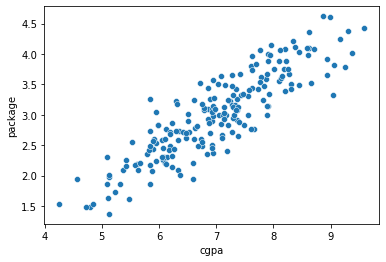

In [5]:
sns.scatterplot(df['cgpa'],df['package'])

In [6]:
X=df[['cgpa']]
y=df[['package']]

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=33)

In [8]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

y_pred_test=lr_model.predict(X_test)
y_pred_train=lr_model.predict(X_train)

### training accuracy

In [9]:
acc_train=r2_score(y_test,y_pred_test)
print(f"training accuracy : {acc_train}")

training accuracy : 0.7574974746709521


### testing accuracy

In [10]:
acc_train=r2_score(y_train,y_pred_train)
print(f"testing accuracy: {acc_train}")

testing accuracy: 0.7776401258033372


#  for presentation

## 1. Visualization

C:\Users\Dayton\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


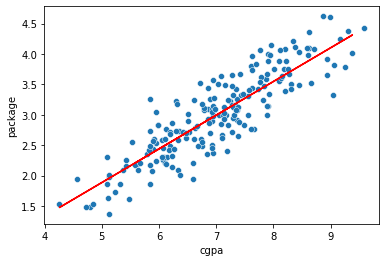

In [11]:
sns.scatterplot(df['cgpa'],df['package'])
plt.plot(X_train,y_pred_train,color='red')


## 2. coeff and intercept

In [12]:
lr_model.coef_

array([[0.55395184]])

In [13]:
lr_model.intercept_

array([-0.88458756])

# serializing (pickling) our model for production

In [14]:
import pickle

In [15]:
with open ('lr_model.pkl','wb') as file:
    pickle.dump(lr_model,file)

# user test function

## 1. script

In [16]:
user_1= float(input('Enter your cgpa'))
user_2= float(input('Enter your cgpa'))

Enter your cgpa10
Enter your cgpa5


In [17]:
user_1=[[user_1]]
user_2=[[user_2]]

In [18]:
print(f'User_1 will get package of : {lr_model.predict(user_1)} lpa')
print(f'User_2 will get package of : {lr_model.predict(user_2)} lpa')

User_1 will get package of : [[4.65493081]] lpa
User_2 will get package of : [[1.88517162]] lpa


C:\Users\Dayton\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Dayton\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 2. function

In [19]:
def user_input(value):
    value=float(input('Enter your cgpa'))
    value=[[value]]
    
    print(f'you will get {lr_model.predict(value)}lpa package')
    
    return lr_model.predict(value)
    

In [20]:
user_input(10)

Enter your cgpa10
you will get [[4.65493081]]lpa package


C:\Users\Dayton\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Dayton\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[4.65493081]])

## creating json file for prediction while deployment

In [21]:
X_test.shape

(40, 1)

In [22]:
columns=X_test.columns

In [23]:
columns

Index(['cgpa'], dtype='object')

In [24]:
columns=X_test.columns.to_list() # converting columns into list

In [25]:
columns

['cgpa']

In [26]:
columns_dict = {'column_name':columns}   # created dict coz json file requires only dictionary file
columns_dict

{'column_name': ['cgpa']}

In [27]:
import json

In [28]:
with open('column_name.json','w') as json_file:
    json.dump(columns_dict,json_file)

## creating test function for flask

In [31]:
# def user_input(value):
#     result=lr_model.predict(value)
#     print(result)



user_input_data=[X_test.iloc[1][::]]
user_input_data

[cgpa    8.01
 Name: 171, dtype: float64]

In [32]:
result=lr_model.predict(user_input_data)

C:\Users\Dayton\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
result

array([[3.55256665]])